In [1]:
%load_ext autoreload
%autoreload 2

In [10]:
import sys
import os
from matplotlib import pyplot as plt
from pathlib import Path
import torch
import cv2
import json
import numpy as np
import matplotlib.patches as patches

In [3]:
sys.path.append(os.path.abspath("../src/text_detector_model"))

In [7]:
data_version = "20250410185834"

In [8]:
documents_dir = Path(f"/Users/volpea/Documents/projects/document-generator-job/data/sampling/document_19/{data_version}/")

In [11]:
with open(documents_dir / "train_labels.json", "r") as f:
    train_labels = json.load(f)

In [20]:
train_labels["sample_0.png"][0]

{'template_box_id': 77,
 'name': 'Item 1',
 'label': 'WRGSFZWFDLN',
 'coords': [[97, 705], [372, 705], [372, 728], [97, 728]]}

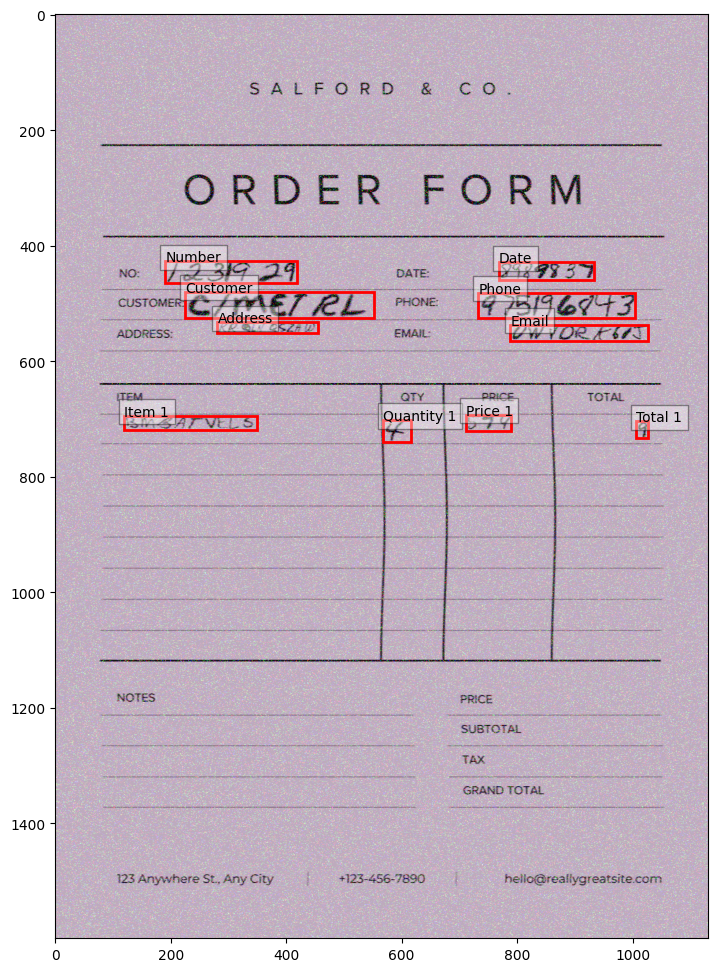

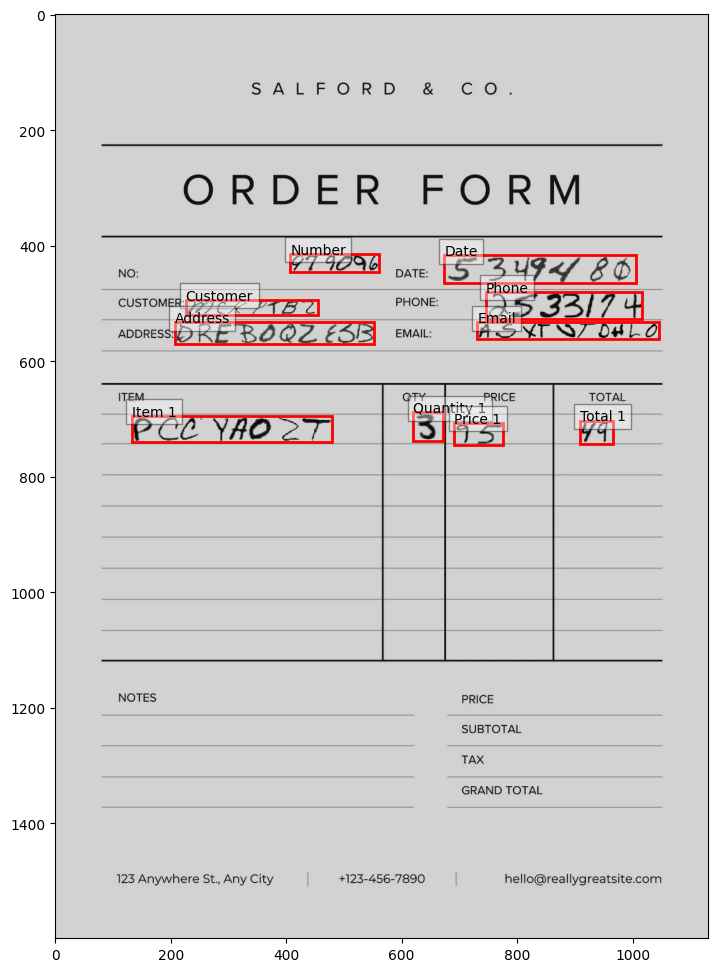

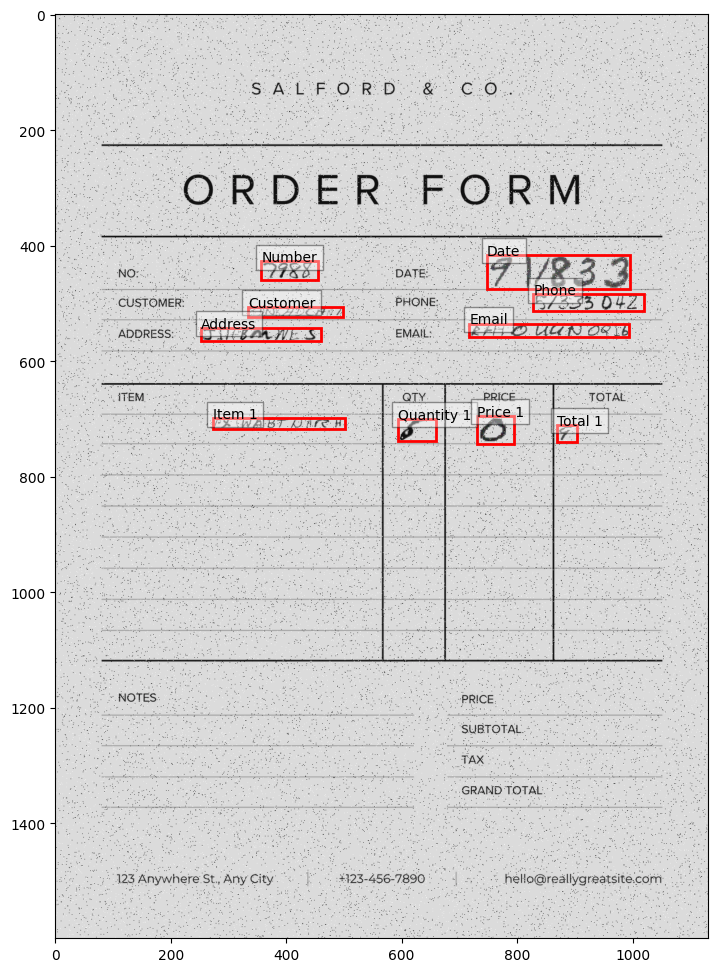

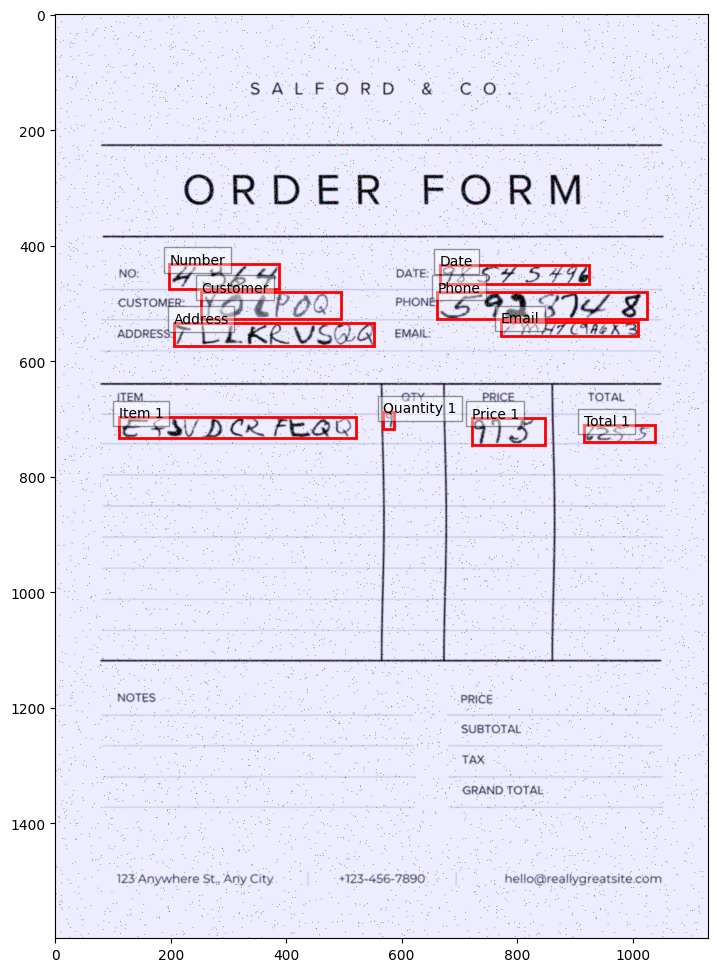

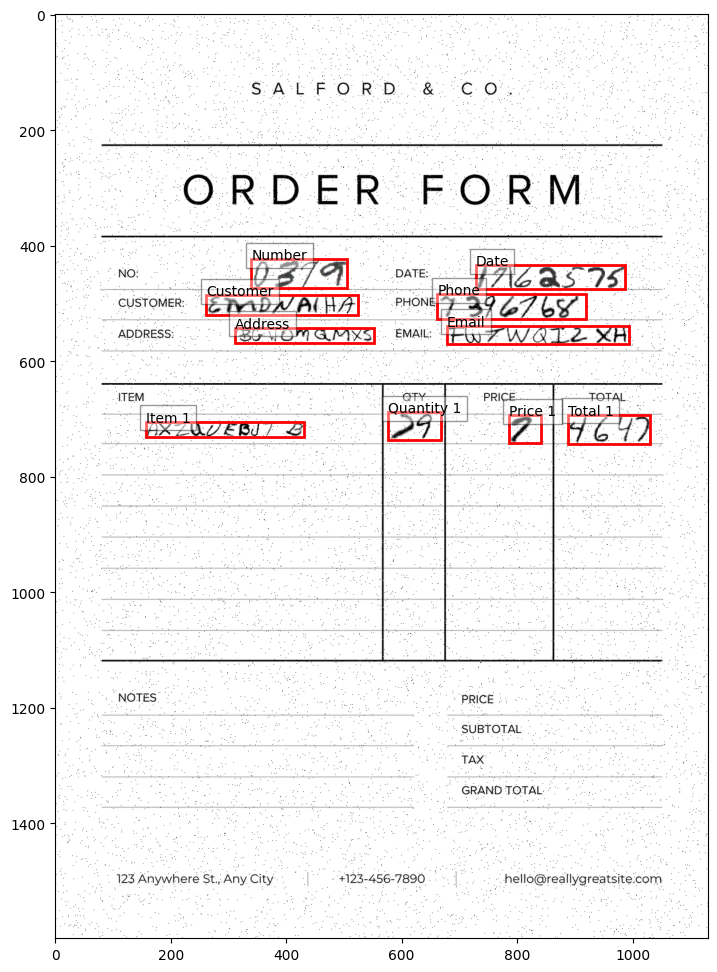

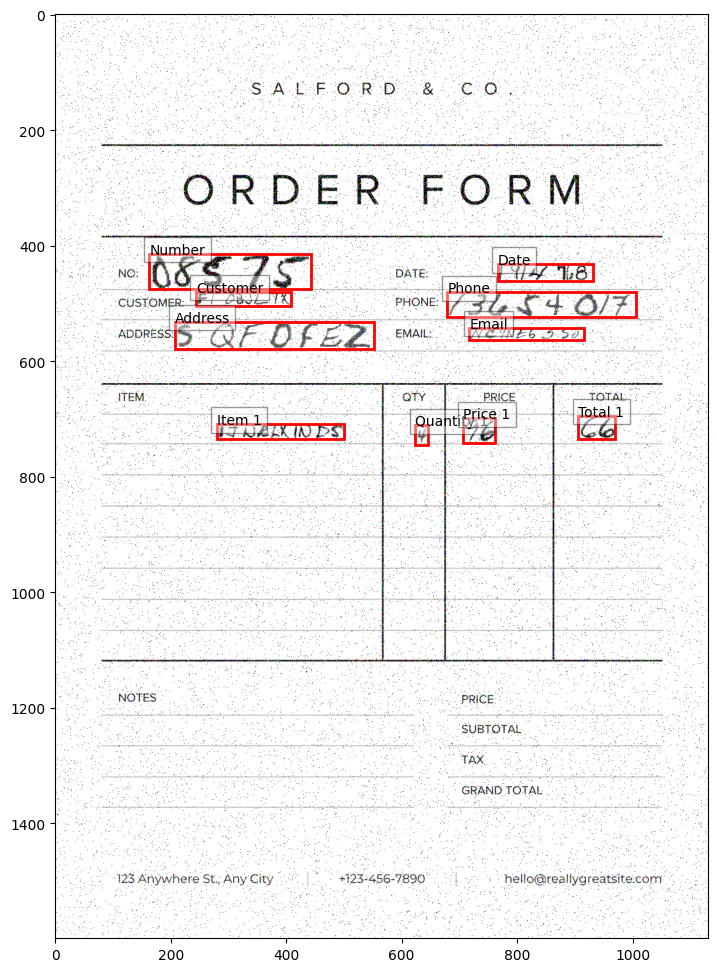

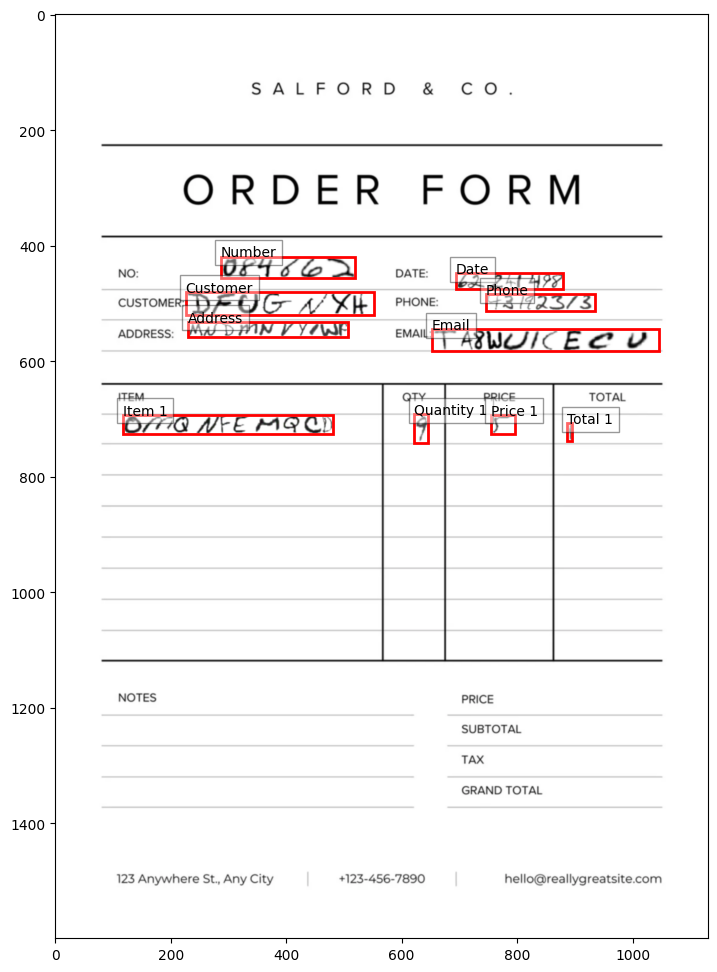

In [30]:
for idx, doc_path in enumerate((documents_dir / "train").iterdir()):
    sample_name = doc_path.name
    sample_labels = train_labels[sample_name]
    image = cv2.imread(doc_path)

    plt.figure(figsize=(12, 12))
    plt.imshow(image)
    ax = plt.gca()

    for label in sample_labels:
        coords = label["coords"]
        class_name = label["name"]
        x1, y1, x2, y2 = coords[0][0], coords[0][1], coords[2][0], coords[2][1]
        rect = patches.Rectangle((x1, y1), x2-x1, y2-y1, linewidth=2, 
                                 edgecolor='r', facecolor='none')
        ax.add_patch(rect)
        plt.text(x1, y1, class_name, fontsize=10, bbox=dict(facecolor='white', alpha=0.4))
    
    plt.show()

    if idx > 5:
        break